<a href="https://colab.research.google.com/github/SergioRojasM/Visualizacion-AG1/blob/main/Visualizacion_AG3_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar modulos necesarios
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt

In [2]:
#Cargamos el data set de los pasajeros del Titanic
url="http://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
s=requests.get(url).content
titanic=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.rename(columns={'class':'clase', 'fare': 'tarifa'}, inplace=True)


In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='clase', ylabel='count'>

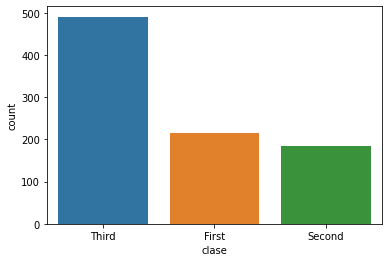

In [6]:
sns.countplot(x="clase", data=titanic)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


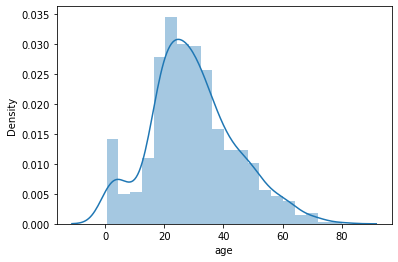

In [7]:
#Distribución de la edad(ege) 
sns.distplot(titanic.age.dropna( ))
plt.show( )

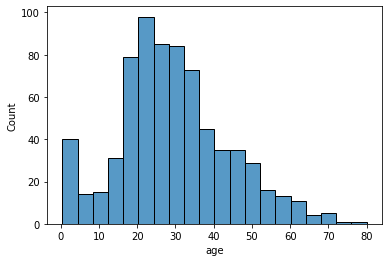

In [8]:
#Distribución de la edad(ege) 
sns.histplot(titanic.age.dropna( ))
plt.show( )

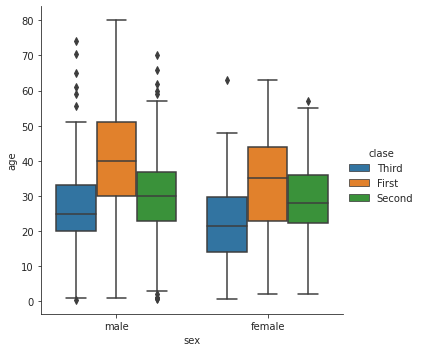

In [10]:
# BoxPlot de la edad por sexo y clase

with sns.axes_style(style='ticks'):
  ax = sns.catplot("sex", "age", "clase" ,data=titanic, kind="box")

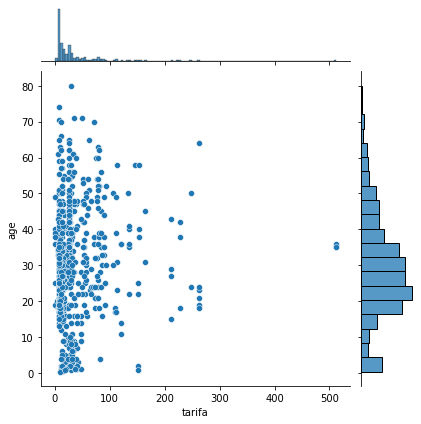

In [11]:
#Distribución cruzada de Edad y Tarifa

sns.jointplot(x='tarifa',y='age',data=titanic)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

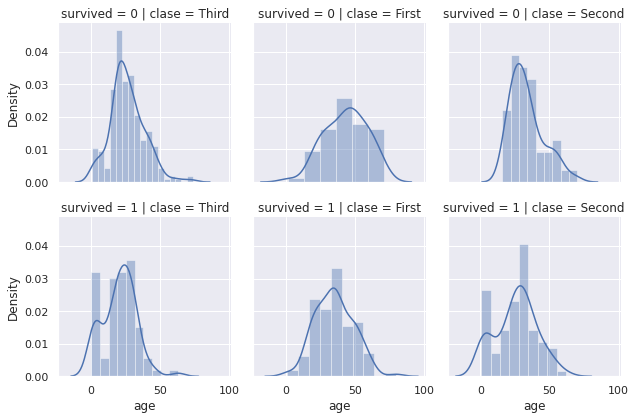

In [12]:
#Cambiamos el font
sns.set(font_scale=1)

#FacetGrid - Construir una matriz de gráficos
g = sns.FacetGrid(titanic, row='survived',col='clase')
g.map(sns.distplot, "age")
plt.show()

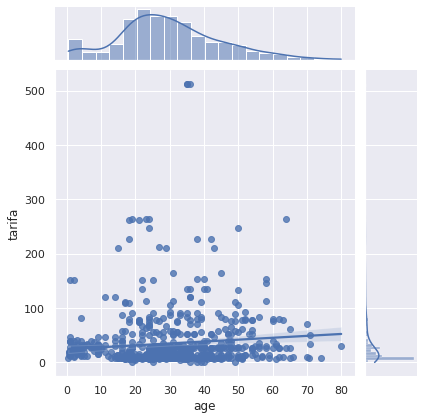

In [14]:
#Diagrama de dispersion con Distribucion de cada variable: fare(precio)/age(edad)

sns.jointplot(data=titanic, x='age', y='tarifa',kind='reg', color='b')
plt.show()

Text(0.5, 1.0, 'titanic.corr()')

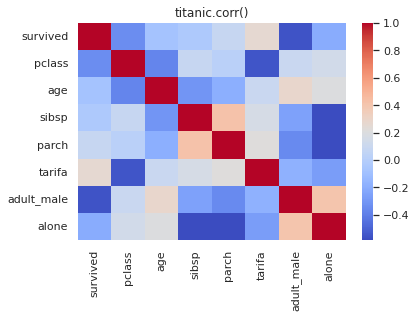

In [15]:
tc = titanic.corr()
sns.heatmap(tc, cmap='coolwarm')
plt.title('titanic.corr()')